# Dynamic Equations as Vector Field Generators

$$ f(x,y) = \begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix} = \begin{bmatrix} y \\ -x \end{bmatrix} $$

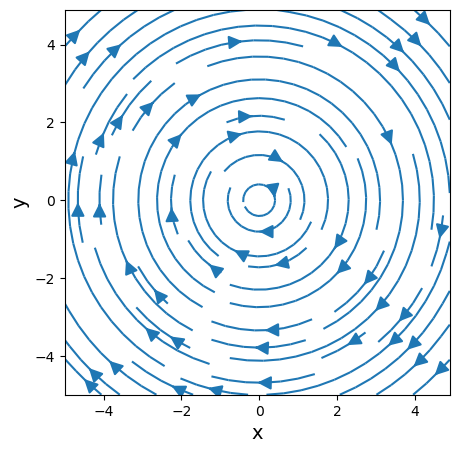

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

# 1D arrays 
x = np.arange(-5,5,0.1) 
y = np.arange(-5,5,0.1) 
  
# Meshgrid 
X, Y = np.meshgrid(x,y)

# Dynamics
def f(x, y):
    return np.array([y, -x])

# Compute vector field
X_dot, Y_dot = f(X,Y)

plt.figure(figsize=(5,5))
plt.streamplot(X, Y, X_dot, Y_dot, density=.75, arrowsize=2)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.gca().set_aspect('equal')
plt.show()


$$\begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix} = \begin{bmatrix} y \\ x \end{bmatrix} $$

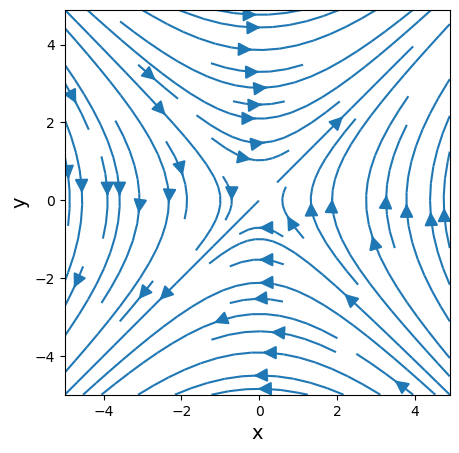

In [6]:
# Dynamics
def f(x, y):
    return np.array([y, x])

# Compute vector field
X_dot, Y_dot = f(X,Y)

plt.figure(figsize=(5,5))
plt.streamplot(X, Y, X_dot, Y_dot, density=.75, arrowsize=2)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.gca().set_aspect('equal')
plt.show()

$$ \begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix} = \begin{bmatrix} -x^3 \\ -y^3 \end{bmatrix} $$

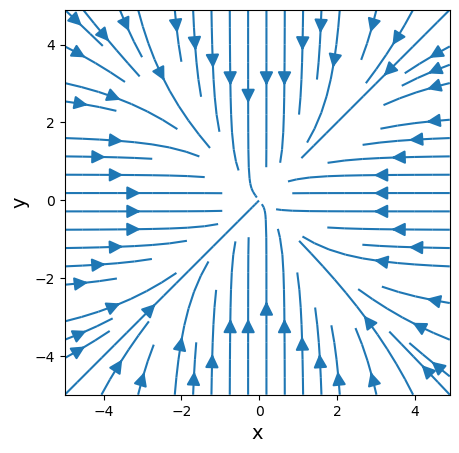

In [7]:
# Dynamics
def f(x, y):
    return np.array([-x**3, -y**3])

# Compute vector field
X_dot, Y_dot = f(X,Y)

plt.figure(figsize=(5,5))
plt.streamplot(X, Y, X_dot, Y_dot, density=.75, arrowsize=2)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.gca().set_aspect('equal')

plt.show()

# Implementing a Control Lyapunov Function (CLF)

$$\dot{x} = \begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix} = f(x) + u =  \begin{bmatrix} x_2 \\ x_1 \end{bmatrix} + \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} $$

$$ V(x) = \frac{1}{2} (x_1^2 + x_2^2) $$

$$\dot{V}(x,u) = \frac{\partial V}{\partial x} \frac{\partial x}{\partial t} = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} x_2 + u_1 \\ x_1 + u_2\end{bmatrix} = x_1(x_2 + u_1) + x_2(x_1 + u_2) $$

We want to choose $u$ such that for any given $x \in \mathcal{X} \subset \mathbb{R}^2$,

$$\dot{V}(x,u) + \lambda V(x) = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} + 2 x_1x_2 +\lambda V(x)  \leq 0 $$

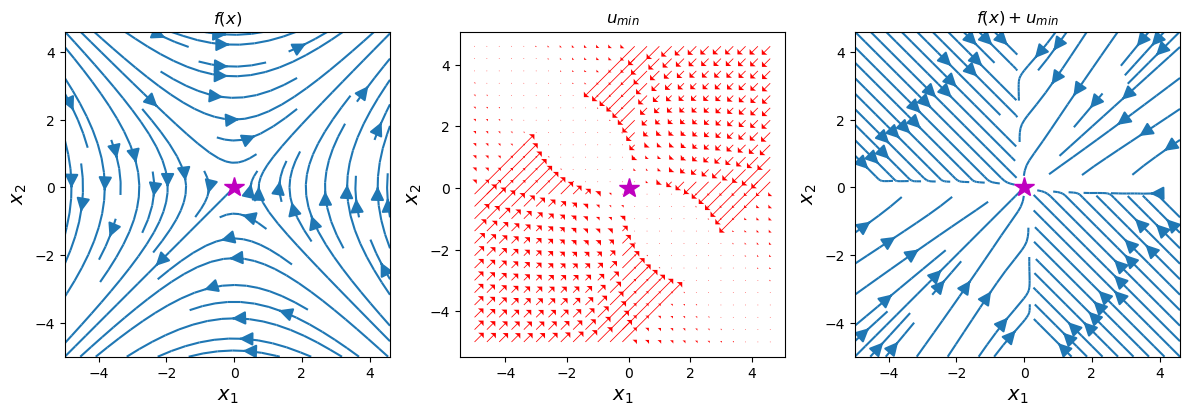

In [148]:
import cvxopt as opt
from cvxopt import matrix
from cvxopt.solvers import qp

opt.solvers.options['show_progress'] = False

# Dynamics
def f(x):
    A = np.array([[0, 1],
                  [1, 0]])
    return A@x

def V(x, x_e):
    return .5*(np.sum((x - x_e)**2))

def dVdx(x, x_e):
    return (x - x_e).T

def get_min_u(x, x_e):
    lam = 1
    Q = matrix(np.eye(2))
    q = matrix(np.zeros((2,1)))
    G = matrix(dVdx(x, x_e))
    h = matrix(-dVdx(x,x_e)@f(x)-lam*V(x,x_e))

    sol = qp(Q,q,G,h)

    return  np.array(sol['x'])

# Choose the coordinate to drive the system to
x_e = np.array([[0.0, 0.0]]).T

# 1D arrays 
x1 = np.arange(-5,5,0.4) 
x2 = np.arange(-5,5,0.4) 
  
# Meshgrid 
X1, X2 = np.meshgrid(x1,x2)

U1, U2 = np.zeros(X1.shape), np.zeros(X2.shape)
X1_dot, X2_dot = np.zeros(X1.shape), np.zeros(X2.shape)

for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([X1[i,j],X2[i,j]])
        X1_dot[i,j], X2_dot[i,j] = f(x)
        u_min = get_min_u(x, x_e)
        U1[i,j], U2[i,j] = u_min


plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.streamplot(X1, X2, X1_dot, X2_dot, density=.75, arrowsize=2)
plt.plot(x_e[0], x_e[1], 'm*',markersize=15)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'$f(x)$')
plt.gca().set_aspect('equal')

plt.subplot(1,3,2)
plt.quiver(X1, X2, U1, U2, color='red',headwidth=10)
plt.plot(x_e[0], x_e[1], 'm*',markersize=15)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'$u_{min}$')
plt.gca().set_aspect('equal')

plt.subplot(1,3,3)
plt.streamplot(X1, X2, X1_dot+U1, X2_dot+U2, density=.75, arrowsize=2)
plt.plot(x_e[0], x_e[1], 'm*',markersize=15)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'$f(x)+u_{min}$')
plt.gca().set_aspect('equal')
plt.tight_layout()


plt.show()

c:\Users\brook\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


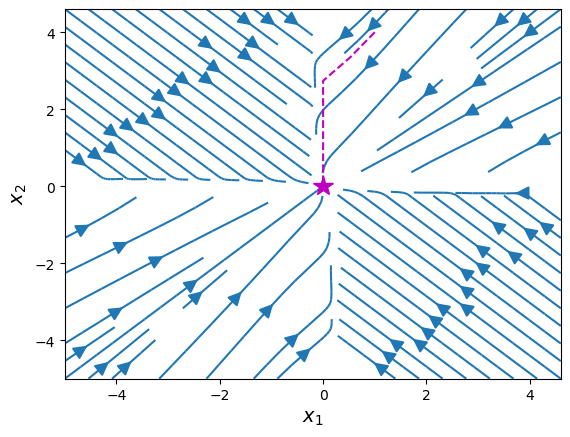

In [150]:
from scipy.integrate import odeint

def dynamics(x, t):
    # print(t)
    u_min = get_min_u(x, x_e)
    return f(x)+u_min.flatten()

x0 = np.array([1,4])
numsteps = 100
t = np.linspace(0, 6, numsteps)

sol = odeint(dynamics, x0, t)

plt.figure()
plt.streamplot(X1, X2, X1_dot+U1, X2_dot+U2, density=.75, arrowsize=2)
plt.plot(x_e[0], x_e[1], 'm*',markersize=15)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.plot(sol[:,0],sol[:,1], 'm--')

plt.show()

# Implementing a Control Barrier Function (CBF)